<a href="https://colab.research.google.com/github/Ma7moudYasser/IntelligentAglorithmsForERU/blob/main/ANN%20for%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt



from IPython import display
display.set_matplotlib_formats("svg")


<ipython-input-1-f9ff6300ab81>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


# Creating DataSet

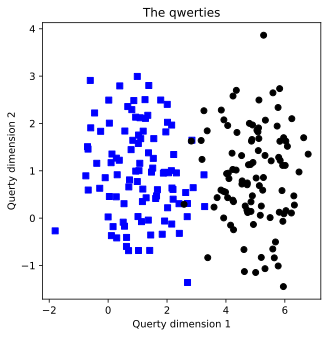

In [5]:
nPerCluster = 100
blur = 1

#generate data

A = [1,1]
B = [5,1]
a = [A[0]+ np.random.randn(nPerCluster)*blur, A[1] + np.random.randn(nPerCluster)*blur]
b = [B[0]+ np.random.randn(nPerCluster)*blur, B[1] + np.random.randn(nPerCluster)*blur]



# True labels
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster,1))))

# Concatenate into matrix
data_np = np.hstack((a,b)).T
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#Show data
fig = plt.figure(figsize = (5,5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.title("The qwerties")
plt.xlabel('Querty dimension 1')
plt.ylabel('Querty dimension 2')
plt.show()

In [6]:
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))


<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


# Building the model

In [8]:
AnnClassify = nn.Sequential (
    nn.Linear(2,1),  # Input
    nn.ReLU(), # Activation function
    nn.Linear(1,1), # Output unit
    nn.Sigmoid() # Final activation unit
)

AnnClassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

# Setting the model parameters

In [10]:
learningRate = .01

#loss function
lossfun = nn.BCELoss()


optimizer = torch.optim.SGD(AnnClassify.parameters(), lr = learningRate)

# Training the model

In [11]:
numepochs = 1000
losses = torch.zeros(numepochs)


for epochi in range(numepochs):
  yHat = AnnClassify(data)

  #Forward pass
  yHat = AnnClassify(data)

  #Compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss


  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


# Illustration

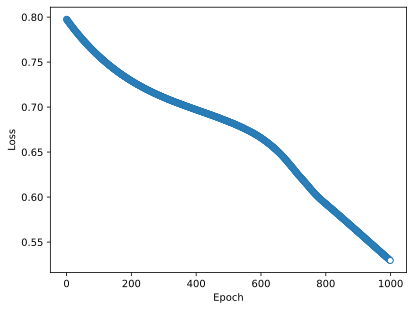

In [12]:
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Computing Predictions

In [14]:
predictions = AnnClassify(data)
predlabels = predictions>0.5

# print(predictions)
# Find errors
misclassified = np.where(predlabels != labels)[0]

#total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerCluster)
print('Final accuracy: %g%%' %totalacc)

Final accuracy: 90%


# Final plotting

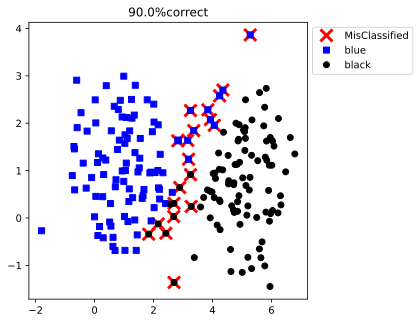

In [16]:
fig = plt.figure(figsize = (5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize = 12, markeredgewidth = 3)
plt.plot(data[np.where(~predlabels)[0], 0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0], 0], data[np.where(predlabels)[0],1], 'ko')


plt.legend(['MisClassified', 'blue', 'black'], bbox_to_anchor = (1,1))
plt.title(f'{totalacc}%correct')
plt.show()